In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import openpyxl 


In [ ]:
df = pd.read_csv("../data/data_model.csv")
df_code = pd.read_excel('../data/zipcode_be.xlsx')

In [ ]:
'''{
  "data": {
    "area": int,
    "property-type": "APARTMENT" | "HOUSE" | "OTHERS",
    "rooms-number": int,
    "zip-code": int,
    "land-area": Optional[int],
    "garden": Optional[bool],
    "garden-area": Optional[int],
    "equipped-kitchen": Optional[bool],
    "full-address": Optional[str],
    "swimming-pool": Optional[bool],
    "furnished": Optional[bool],
    "open-fire": Optional[bool],
    "terrace": Optional[bool],
    "terrace-area": Optional[int],
    "facades-number": Optional[int],
    "building-state": Optional[
      "NEW" | "GOOD" | "TO RENOVATE" | "JUST RENOVATED" | "TO REBUILD"
    ]
  }
}
'''

In [ ]:
#df = df.drop('Unnamed: 0', axis=1)
df = df.rename({'Unnamed: 0': 'id'}, axis=1)
df.head()

In [ ]:
#df.hist(bins=50, figsize=(15, 15), )

In [ ]:
df = df.rename({'Unnamed: 0': 'id'}, axis=1)
df.head()
df['code'] = df['zip-code']
df_code['code']=df_code['code'].astype(int)
df['code']=df['code'].astype(int)
df = df.merge(df_code, on='code', how='left')
df = df.drop_duplicates(subset="id")
df = df.dropna()

In [ ]:
df['lng'] = df['lng'].astype(int)
df['lat'] = df['lat'].astype(int)

In [ ]:
df.head()

In [ ]:
df['building-state'] = (df['building-state']).replace({'good': 0, 'to renovate': 0, 'as new': 1, 'to be done up': 0, 
'just renovated': 0, 'to restore':0, 'to rebuild':0 , 'not mentioned': 0})


In [ ]:
# sns.set_style("whitegrid")
# fig, ax = plt.subplots(1,1, figsize=(10, 8), dpi=80)

# # Find the order
# my_order = df.groupby(by=["building-state"])["price"].mean().sort_values(ascending=False).index

# box_plot = sns.boxplot(x = 'building-state',y = 'price',data = df, order=my_order, showfliers=False, palette="mako")
# plt.ylabel('Price', fontsize=20, fontweight='bold', fontfamily='times')


# plt.xlabel('')
# #plt.title('Comparison of real estate prices in provinces of Belgium', fontsize=30, fontweight='bold', fontfamily='times')
# ax = box_plot.axes
# ax.text(x=0.5, y=1.1, s='Comparison of real estate prices\n of building-state in Belgium', fontfamily='times', fontsize=25, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
# ax.text(x=0.5, y=1.05, s='source: immoweb.com', fontsize=15, alpha=0.75, ha='center', fontfamily='times', va='bottom', transform=ax.transAxes)

# lines = ax.get_lines()

# ax.tick_params(axis='x', rotation=90)

# for s in ['top', 'left', 'right']:
#     ax.spines[s].set_visible(False)
# ax.grid(axis='y', linestyle='-', alpha=0.4) 

# box_plot.figure.tight_layout()

In [ ]:

cor_mat= df[:].corr()
fig=plt.gcf()
fig.set_size_inches(15,15)
sns.heatmap(data=cor_mat, square=True, annot=True, cbar=True, cmap="mako")
plt.savefig('corr-matrix.png')
plt.show()

In [ ]:
#LinerRegression model: only variables with >0.2 of correlation

y= np.array(df['price']).reshape(-1,1)
X= df.drop(['price','full-address', 'property-type', 'building-state','zip-code','garden','equipped-kitchen','furnished','open-fire', 'terrace-area', 'facades-number','name', 'province'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state = 42)
model = LinearRegression()
model.fit(X_train,y_train)
pred=model.predict(X_test)
predictions = pred.reshape(-1,1)
print('MSE : ', mean_squared_error(y_test,predictions))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,predictions)))
print('Score:', model.score(X_train, y_train))

In [ ]:
# LinerRegression model: only variables with >0.3 of correlation
y= np.array(df['price']).reshape(-1,1)
X= df.drop(['price','full-address', 'property-type', 'building-state','zip-code','garden','equipped-kitchen','furnished','open-fire', 'terrace-area', 'facades-number', 'swimming-pool', 'garden-area','name', 'province'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state = 42)
model = LinearRegression()
model.fit(X_train,y_train)
pred=model.predict(X_test)
predictions = pred.reshape(-1,1)
print('MSE : ', mean_squared_error(y_test,predictions))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,predictions)))
print('Score:', model.score(X_train, y_train))


import matplotlib.pyplot as plt


# Initialize layout
fig = plt.subplots(figsize = (9, 9))

plt.scatter(y_test, pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'g', lw=4)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")










In [ ]:
#split dataframe in Houses x Apartments
df_house= df[df['property-type'] == 'house']
df_apt = df[df['property-type'] == 'apartment']
print(df_house.shape)
print(df_apt.shape)


In [ ]:
# LinerRegression model: only variables with Price vs Area

X= np.array(df['area']).reshape(-1,1)
y= np.array(df['price']).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state = 42)
model = LinearRegression()
model.fit(X_train,y_train)
pred=model.predict(X_test)
predictions = pred.reshape(-1,1)
print('MSE: ', mean_squared_error(y_test,predictions))
print('RMSE: ', np.sqrt(mean_squared_error(y_test,predictions)))
print('Score:', model.score(X_train, y_train))

In [ ]:
# LinerRegression model: only variables with Price vs Rooms number

X= np.array(df['rooms-number']).reshape(-1,1)
y= np.array(df['price']).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state = 42)
model = LinearRegression()
model.fit(X_train,y_train)
pred=model.predict(X_test)
predictions = pred.reshape(-1,1)
print('MSE: ', mean_squared_error(y_test,predictions))
print('RMSE: ', np.sqrt(mean_squared_error(y_test,predictions)))
print('Score:', model.score(X_train, y_train))

import matplotlib.pyplot as plt

plt.scatter(y_test, pred)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.show()

## Houses

MSE:  354117843162.244
RMSE:  595078.0143495842
Score: 0.011472143257574285


Text(0, 0.5, 'Predicted prices')

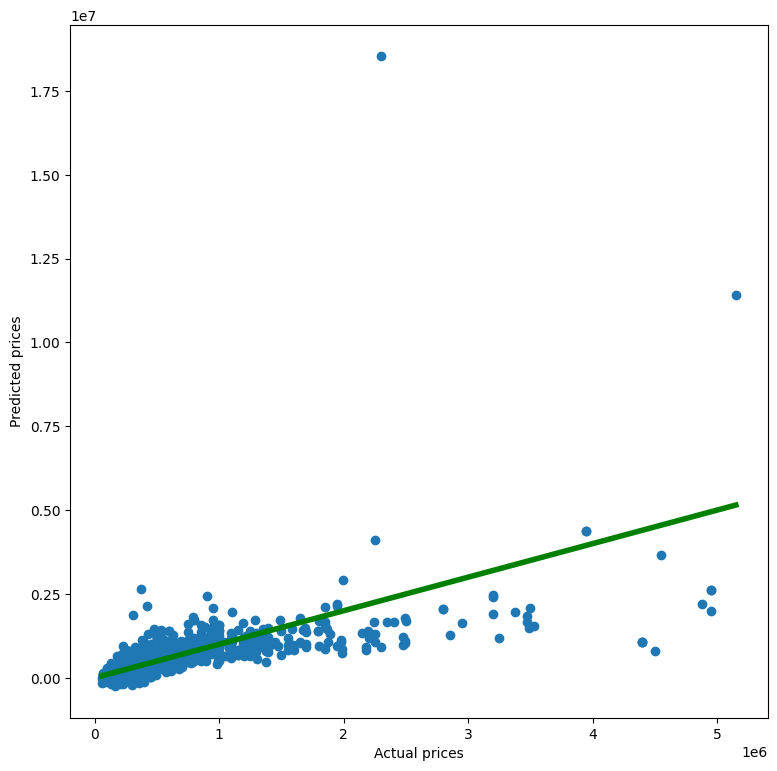

In [83]:
#LinearRegression model with lat/lng for HOUSES

y= np.array(df_house['price']).reshape(-1,1)
X= df_house.drop(['price','property-type', 'full-address','name', 'province'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state = 42)
model = LinearRegression()
model.fit(X_train,y_train)
pred=model.predict(X_test)
predictions = pred.reshape(-1,1)
print('MSE: ', mean_squared_error(y_test,predictions))
print('RMSE: ', np.sqrt(mean_squared_error(y_test,predictions)))
print('Score:', model.score(X_test, y_test))


import matplotlib.pyplot as plt

fig = plt.subplots(figsize = (9, 9))

plt.scatter(y_test, pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'g', lw=4)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")

In [ ]:
df_house.drop(['id','price','property-type', 'full-address','name', 'province'],axis=1)

## Apartments

In [ ]:
#LinearRegression model with lat/lng for APARTMENTS

y= np.array(df_apt['price']).reshape(-1,1)
X= df_apt.drop(['price','property-type', 'full-address','name', 'province'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state = 42)
model = LinearRegression()
model.fit(X_train,y_train)
pred=model.predict(X_test)
predictions = pred.reshape(-1,1)
print('MSE: ', mean_squared_error(y_test,predictions))
print('RMSE: ', np.sqrt(mean_squared_error(y_test,predictions)))
print('Score:', model.score(X_test, y_test))

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix




In [ ]:
y= np.array(df_house['price']).reshape(-1,1)
X= df_house.drop(['price','property-type', 'full-address','name', 'province'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state = 42)

In [ ]:
#Multiple Linear Regression 
y= np.array(df['price']).reshape(-1,1)
X= df.drop(['price','property-type', 'full-address','name', 'province'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state = 42)
mlr = LinearRegression()
mlr.fit(X_train,y_train)
mlr_score = mlr.score(X_test,y_test)
pred_mlr = mlr.predict(X_test)
expl_mlr = explained_variance_score(pred_mlr,y_test)
print('Score: ', mlr_score)
print('MSE: ', mean_squared_error(y_test,pred_mlr))
print('RMSE: ', np.sqrt(mean_squared_error(y_test,pred_mlr)))

In [ ]:
#Decision Tree

df_house= df[df['property-type'] == 'house']
df_apt = df[df['property-type'] == 'apartment']

y= np.array(df_house['price']).reshape(-1,1)
X= df_house.drop(['price','property-type', 'full-address','name', 'province'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state = 42)

tr_regressor = DecisionTreeRegressor(random_state=42)
tr_regressor.fit(X_train,y_train)
pred_tr = tr_regressor.predict(X_test)
decision_score=tr_regressor.score(X_test,y_test)
print('Score:', decision_score)
expl_tr = explained_variance_score(pred_tr,y_test)
print('MSE: ', mean_squared_error(y_test,pred_tr))
print('RMSE: ', np.sqrt(mean_squared_error(y_test,pred_tr)))

In [ ]:
#Random Forest Regression Model 

df_house= df[df['property-type'] == 'house']
df_apt = df[df['property-type'] == 'apartment']

y= np.array(df_house['price']).reshape(-1,1)
X= df_house.drop(['id', 'price','property-type', 'full-address','name', 'province'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state = 42)
rf_regressor = RandomForestRegressor(n_estimators=28,random_state=42)
rf_regressor.fit(X_train,y_train)
rf_pred =rf_regressor.predict(X_test)
rf_score=rf_regressor.score(X_test,y_test)
expl_rf = explained_variance_score(rf_pred,y_test)
print('MSE: ', mean_squared_error(y_test,rf_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test,rf_pred)))
print('Score:', rf_score)

In [ ]:
#SVR Support Vector Regressor model
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing, svm

y= np.array(df_house['price']).reshape(-1,1)
X= df_house.drop(['price','property-type', 'full-address','name', 'province'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state = 42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#Create a svm Classifier
clf = svm.SVC(kernel='rbf', random_state=42) # Linear Kernel
#Train the model using the training sets
clf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
clf_score = clf.score(X_test, y_test)
mse_SVR = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse_SVR}")
print(f"Score: {clf.score(X_test, y_test)}")


In [ ]:
# Ridge model
from sklearn.linear_model import Ridge 

y= np.array(df_house['price']).reshape(-1,1)
X= df_house.drop(['price','property-type', 'full-address','name', 'province'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state = 42)
ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)
score = ridge.score(X_test,y_test)
print(f'the accuracy is {score}')

In [ ]:
from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm

In [ ]:
# Bayesian model
from sklearn.linear_model import BayesianRidge 

y= np.array(df_house['price']).reshape(-1,1)
X= df_house.drop(['price','property-type', 'full-address','name', 'province'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state = 42)
bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
score = bayesian.score(X_test,y_test)
print(f'the accuracy is {score}')

In [ ]:
# ElasticNet model 
from sklearn.linear_model import ElasticNet 

y= np.array(df_house['price']).reshape(-1,1)
X= df_house.drop(['price','property-type', 'full-address','name', 'province'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state = 42)
en = ElasticNet(alpha = 0.01)
en.fit(X_train, y_train)
score = en.score(X_test,y_test)
print(f'the accuracy is {score}')

In [ ]:
#Lasso model 
from sklearn.linear_model import Lasso 

y= np.array(df_house['price']).reshape(-1,1)
X= df_house.drop(['price','property-type', 'full-address','name', 'province'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state = 42)
lasso = Lasso(alpha = 10)
lasso.fit(X_train,y_train)
train_score_ls =lasso.score(X_train,y_train)
test_score_ls =lasso.score(X_test,y_test)

print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))

In [ ]:
#Gradient Boosting Regressor
from sklearn import ensemble


y= np.array(df_house['price']).reshape(-1,1)
X= df_house.drop(['price','property-type', 'full-address','name', 'province'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state = 42)

clf = ensemble.GradientBoostingRegressor(n_estimators=400,max_depth=5,min_samples_split=2,learning_rate=0.1,loss= 'ls')
clf.fit(X_train,y_train)
score = clf.score(X_test,y_test)
print(f'the accuracy is {score}')

In [ ]:
#pandas data frame, for a clear comparison

models_score =pd.DataFrame({'Model':['Multiple Linear Regression','Decision Tree','Random forest Regression','Support Vector Regressor'],
                            'Score':[mlr_score,decision_score,rf_score,clf_score ],
                            'Explained Variance Score':[expl_mlr,expl_tr,expl_rf, mse_SVR]
                           })
models_score.sort_values(by='Score',ascending=False)

In [ ]:
df_PD = pd.read_csv("../data/Properties_data.csv")
df_PD.info()
